In [937]:
import utils_helper as h
from importlib import reload
reload(h)

<module 'utils_helper' from '/Users/spangher/Projects/google-research/deep-research-exploration/notebooks/utils_helper.py'>

# Label Sources

In [854]:
h.all_annotated_citations_df.head()

,ID,Narrative_Function,Perspective,Centrality,Temporal_Role,Citation_Type,Scope,Source_Authority,source,article_title,article_summary
0,1,Historical Background,"[Informative, Supportive]",Medium,Historical,News article,International/comparative,Media organization,deep_research,A Collision of Titans: The Turbulent Saga of E...,The tumultuous relationship between Elon Musk ...
1,2,Supporting Evidence,[Skeptical],High,Current event,News article,National,Media organization,deep_research,A Collision of Titans: The Turbulent Saga of E...,The tumultuous relationship between Elon Musk ...
2,3,Demonstration of Impact,[Skeptical],High,Current event,News article,National,Media organization,deep_research,A Collision of Titans: The Turbulent Saga of E...,The tumultuous relationship between Elon Musk ...
3,5,Demonstration of Impact,[Informative],Medium,Current event,Expert opinion,Sector-specific,Media organization,deep_research,A Collision of Titans: The Turbulent Saga of E...,The tumultuous relationship between Elon Musk ...
4,6,Expert Commentary,[Informative],Medium,Current event,News article,National,Media organization,deep_research,A Collision of Titans: The Turbulent Saga of E...,The tumultuous relationship between Elon Musk ...


In [898]:
(h.all_annotated_citations_df
 .pipe(h.analyze_column, 'Source_Authority')
 .drop(columns=['Cannot Determine'])
 .style.format(precision=3, na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
)

Source_Authority,Academic source,Government source,Industry body,Media organization,NGO/think tank,Other
source,,,,,,
deep_research,0.105,0.177,0.015,0.541,0.118,0.044
news,0.106,0.338,0.099,0.244,0.100,0.098
wikipedia,0.052,0.072,0.015,0.711,0.056,0.071


In [895]:
# Narrative function of all sources in the story
(h.all_annotated_citations_df
 .pipe(h.analyze_column, 'Narrative_Function').drop(columns=['Cannot Determine'])
 .style.format(precision=3, na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
)

Narrative_Function,Additional Context,Counterpoint,Demonstration of Impact,Expert Commentary,Explanation,Future Projection,Historical Background,Human Perspective,Other,Supporting Evidence
source,,,,,,,,,,
deep_research,0.160,0.080,0.158,0.044,0.143,0.030,0.157,0.000,0.025,0.203
news,0.072,0.131,0.099,0.124,0.176,0.028,0.087,0.042,0.000,0.240
wikipedia,0.109,0.179,0.198,0.020,0.140,0.035,0.063,0.028,0.004,0.190


In [983]:
t = h.all_annotated_citations_df.pipe(h.analyze_column, 'Narrative_Function').drop(columns=[
    'Cannot Determine', 'Additional Context', 'Demonstration of Impact', 'Other'
    ])

In [993]:
# (2) compute the ratios vs. deep_research
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandas import IndexSlice as idx
ratios = t.pipe(lambda df: (df+ .05).div(df.loc["Deep Research"] + .05, axis=1))
vmin, vmax = ratios.min().min(), ratios.max().max()
cmap = plt.cm.RdYlGn
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=1, vmax=vmax)

# (3) build the styler
from pandas import IndexSlice as idx

def color_news_wiki(row):
    if row.name in ["News", "Wikipedia"]:
        # map each cell’s ratio -> hex color
        return [
            f"background-color: {mcolors.to_hex(cmap(norm(ratios.at[row.name, col])))}"
            for col in row.index
        ]
    else:
        # deep_research stays uncolored
        return [""] * len(row)



# Save the styled DataFrame to a PNG file

# Add '\n' for whitespace in column names
t.columns = [col.replace(' ', '\n') for col in t.columns]
t.index = list(map( lambda x: x.replace('_', ' ').title(), t.index))
t.index.name = None

styler = (
    t.map(lambda x: str(round(x * 100, 1)) + '%').style
      .format(precision=3, na_rep='')
      .apply(color_news_wiki, axis=1)
      .set_table_styles(
          [{'selector': 'th', 'props': [('max-width', '100px')]}]  # Set max-width for header cells
      )
)
styler.index.name = None


await h.generate_image_async(styler, '../figures/narrative_function_ratios.png')
styler

,Counterpoint,Expert Commentary,Explanation,Future Projection,Historical Background,Human Perspective,Supporting Evidence
Deep Research,8.0%,4.4%,14.3%,3.0%,15.7%,0.0%,20.3%
News,13.1%,12.4%,17.6%,2.8%,8.7%,4.2%,24.0%
Wikipedia,17.9%,2.0%,14.0%,3.5%,6.3%,2.8%,19.0%


In [950]:
# Perspective of all sources in each story
styler = (h.all_annotated_citations_df
 .explode('Perspective')
 .pipe(h.analyze_column, 'Perspective').drop(columns=['Cannot Determine'])
 .style.format(precision=3, na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
 )
styler

Perspective,Against,Authoritative,Informative,Neutral,Skeptical,Supportive
source,,,,,,
deep_research,0.000,0.037,0.493,0.125,0.164,0.155
news,0.050,0.135,0.329,0.101,0.122,0.264
wikipedia,0.052,0.065,0.403,0.128,0.159,0.163


In [926]:
h.full_combined_df

,title,content,citation_summaries,source
0,A Collision of Titans: The Turbulent Saga of E...,"The relationship between Elon Musk, the mercur...","[{'citation_id': '1', 'citation': 'Why Are Don...",deep_research
1,The Enduring Allure and Strategic Significance...,The Enduring Allure and Strategic Significance...,"[{'citation_id': '1', 'citation': 'Net Zero - ...",deep_research
2,The Russia-Ukraine Conflict: 2022 Onwards – Ge...,The Russia-Ukraine Conflict: 2022 Onwards – Ge...,"[{'citation_id': '1', 'citation': 'United Nati...",deep_research
3,"COP29 in Baku: Navigating Finance, Finalizing ...",I. Executive Summary\n\nThe 29th Conference of...,"[{'citation_id': '1', 'citation': 'Panda Diplo...",deep_research
4,Australia's Enduring Pursuit of Carbon Pricing...,1. Executive Summary\n\nAustralia's engagement...,"[{'citation_id': '1', 'citation': 'Russo-Ukrai...",deep_research
0,Carbon Pricing in Australia,Financial year Carbon Price\* (\$/tonne)\n2...,"[{'citation_id': '1', 'citation': '""About the ...",wikipedia
1,Elon Musk–Donald Trump Feud,"Since June 2025, the businessman and former pr...","[{'citation_id': '1', 'citation': '""UN Climate...",wikipedia
2,Panda diplomacy,Panda diplomacy (Chinese: 熊猫外交) is the practic...,"[{'citation_id': '1', 'citation': 'Karl, Jonat...",wikipedia
3,2024 United Nations Climate Change Conference,The 2024 United Nations Climate Change Confere...,"[{'citation_id': '1', 'citation': '""Panda dipl...",wikipedia
4,Russian Invasion of Ukraine,This article is about the conflict that began ...,"[{'citation_id': '15', 'citation': 'McFaul, Mi...",wikipedia


In [1060]:
# Perspective of all sources in each story
t = (h.all_annotated_citations_df
#  .groupby(['source', 'article_title']).apply(lambda df: df.iloc[0]).reset_index(drop=True)
 .explode('Perspective')
 .pipe(h.analyze_column, 'Perspective')
 .drop(columns=['Cannot Determine'])
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/perspective.png')
t


Perspective,Against,Authoritative,Informative,Neutral,Skeptical,Supportive
DR,0.0%,3.8%,49.3%,12.5%,16.4%,15.5%
N,5.0%,13.5%,32.9%,10.1%,12.2%,26.4%
W,5.2%,6.5%,40.3%,12.8%,15.9%,16.3%


In [1059]:
# Perspective of the first source in each story
t = (h.all_annotated_citations_df
 .groupby(['source', 'article_title']).apply(lambda df: df.iloc[0]).reset_index(drop=True)
 .explode('Perspective')
 .pipe(h.analyze_column, 'Perspective')
 .drop(columns=['Cannot Determine'])
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/perspective_first_source.png')
t


Perspective,Against,Authoritative,Informative,Neutral,Skeptical,Supportive
DR,0.0%,0.0%,40.0%,30.0%,0.0%,10.0%
N,2.3%,11.4%,34.1%,6.8%,13.6%,31.8%
W,0.0%,30.0%,50.0%,0.0%,0.0%,0.0%


In [1058]:
# Centrality of all sources in each story
t = (h.all_annotated_citations_df
 .pipe(h.analyze_column, 'Centrality')[['High', 'Medium', 'Low']]
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/centrality.png')
t


Centrality,High,Medium,Low
DR,11.3%,59.8%,28.9%
N,38.1%,58.3%,3.6%
W,13.3%,64.9%,18.0%


In [865]:
centrality_aggs = h.aggregate_sources_by_position(
    h.all_annotated_citations_df, 
    'Centrality', ['High', 'Medium', 'Low'], .1, True
)

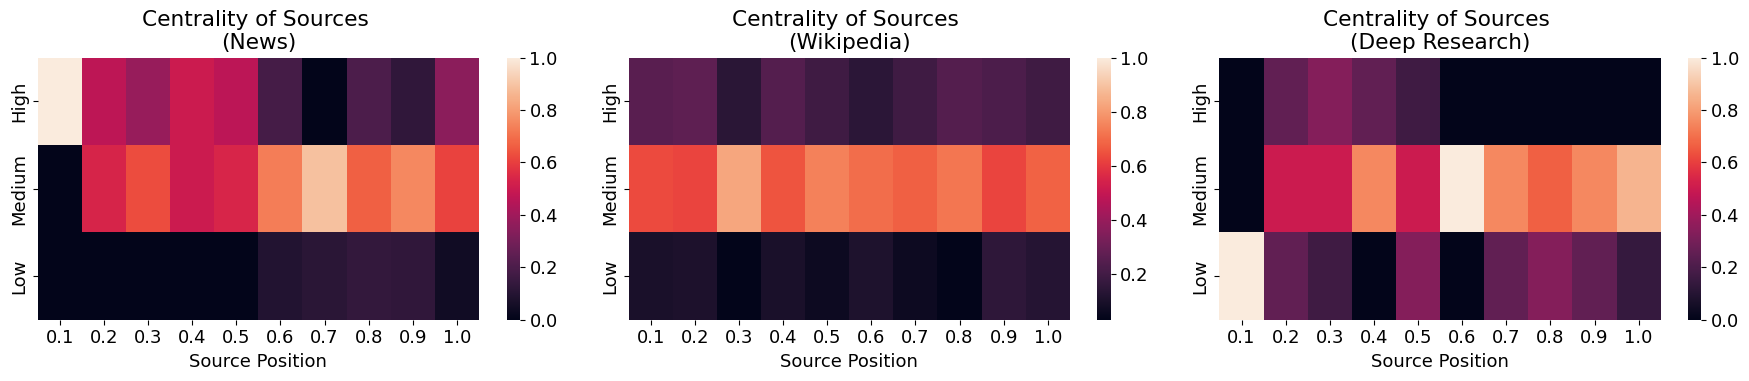

In [927]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=13)
vmax = 1
f, axarr = plt.subplots(1, 3, figsize=(18, 4))
centrality_aggs['news'].pipe(lambda df: sns.heatmap(df, vmax=vmax, ax=axarr[0]))#, vmax=.102))
axarr[0].set_title('Centrality of Sources \n(News)')
axarr[0].set_ylabel('')
axarr[0].set_xlabel('Source Position')

centrality_aggs['wikipedia'].pipe(lambda df: sns.heatmap(df, vmax=vmax, ax=axarr[1]))#, vmax=.102))
axarr[1].set_title('Centrality of Sources \n(Wikipedia)')
axarr[1].set_ylabel('')
axarr[1].set_xlabel('Source Position')

centrality_aggs['deep_research'].pipe(lambda df: sns.heatmap(df, vmax=vmax, ax=axarr[2]))#, vmax=.102))
axarr[2].set_title('Centrality of Sources \n(Deep Research)')
axarr[2].set_ylabel('')
axarr[2].set_xlabel('Source Position')

plt.tight_layout()
plt.savefig('../figures/centrality-heatmap-by-index.png', bbox_inches='tight')

In [1057]:
# Centrality of the first source in each story
t = (h.all_annotated_citations_df
 .groupby(['source', 'article_title']).apply(lambda df: df.iloc[0]).reset_index(drop=True)
 .explode('Centrality')
 .pipe(h.analyze_column, 'Centrality')[['High', 'Medium', 'Low']]
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/centrality_first_source.png')
t

Centrality,High,Medium,Low
DR,0.0%,20.0%,80.0%
N,63.6%,36.4%,0.0%
W,40.0%,0.0%,40.0%


In [1056]:
# Type of source for all sources in each story
t = (h.all_annotated_citations_df
 .pipe(h.analyze_column, 'Citation_Type').drop(columns=['Cannot Determine'])
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/citation_type.png')
t

Citation_Type,Expert opinion,Historical analysis,News article,Other,Policy document,Statistical data
DR,23.4%,5.0%,22.6%,26.6%,15.8%,6.5%
N,59.3%,1.8%,17.3%,10.2%,7.1%,4.2%
W,14.7%,0.3%,60.6%,8.6%,8.8%,3.1%


In [1055]:
# Type of source for the first source in each story
t = (h.all_annotated_citations_df
 .groupby(['source', 'article_title']).apply(lambda df: df.iloc[0]).reset_index(drop=True)
 .pipe(h.analyze_column, 'Citation_Type')
 .drop(columns=['Cannot Determine']).round(3)
 )

t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/citation_type_first_source.png')
t

Citation_Type,Expert opinion,Historical analysis,News article,Other,Policy document,Statistical data
DR,0.0%,0.0%,0.2%,0.6%,0.2%,0.0%
N,0.6%,0.0%,0.1%,0.1%,0.1%,0.0%
W,0.0%,0.0%,0.2%,0.2%,0.2%,0.2%


In [885]:
(h.all_annotated_citations_df
 .loc[lambda df: df['source'] == 'deep_research']
 .loc[lambda df: df['Citation_Type'] == 'Other']
 ['citation'].head(10).tolist()
)

['United Nations Climate Change Conference (UNFCCC COP 29), accessed June 6, 2025, https://www.unep.org/events/conference/united-nations-climate-change-conference-unfccc-cop-29',
 'cop29.az, accessed June 6, 2025, https://cop29.az/en/presidency/cop29-presidency-team',
 'Panda Diplomacy - Diplo Foundation',
 'www.diplomacy.edu',
 'Chinese Soft Power: A Case Study of Panda Diplomacy',
 'Panda diplomacy - Wikipedia',
 "China's long history of panda diplomacy - The University of Western Australia",
 'Pandas: Finnish zoo returning pandas to China eight years early ...',
 'Russo-Ukrainian War - Wikipedia',
 'Timeline of the Russian invasion of Ukraine - Wikipedia']

In [1050]:
# Scope of all sources in each story
t = (h.all_annotated_citations_df
 .pipe(h.analyze_column, 'Scope').drop(columns=['Cannot Determine'])
 .round(3)
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/scope.png')
t

Scope,International/comparative,Local/regional,National,Other,Sector-specific
DR,59.9%,0.0%,30.5%,0.0%,9.6%
N,42.9%,3.2%,41.3%,0.0%,12.6%
W,39.7%,5.2%,33.7%,0.4%,17.2%


In [1052]:
# Source authority of all sources in each story
t = (h.all_annotated_citations_df
 .pipe(h.analyze_column, 'Source_Authority')
 .drop(columns=['Cannot Determine'])
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/source_authority.png')
t

Source_Authority,Academic source,Government source,Industry body,Media organization,NGO/think tank,Other
DR,10.5%,17.7%,1.5%,54.1%,11.8%,4.4%
N,10.6%,33.8%,9.9%,24.4%,10.0%,9.8%
W,5.2%,7.2%,1.5%,71.1%,5.6%,7.1%


In [1054]:
# Source authority of the first source in each story
t = (h.all_annotated_citations_df
 .groupby(['source', 'article_title']).apply(lambda df: df.iloc[0]).reset_index(drop=True)
 .pipe(h.analyze_column, 'Source_Authority')
 .pipe(lambda df: (df * 100).round(1))
)
t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))
t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/source_authority_first_source.png')
t

Source_Authority,Academic source,Government source,Media organization,NGO/think tank,Other
DR,0.0%,20.0%,60.0%,20.0%,0.0%
N,13.6%,45.5%,22.7%,13.6%,4.5%
W,20.0%,20.0%,40.0%,0.0%,20.0%


# Discourse Analysis

In [794]:
import utils_discourse as u 
from importlib import reload
reload(u)

  0%|          | 0/32 [00:00<?, ?it/s]

<module 'utils_discourse' from '/Users/spangher/Projects/google-research/deep-research-exploration/notebooks/utils_discourse.py'>

In [797]:
u.all_discourse_labels_df['discourse_type'].unique()

array(['Explanatory Detail', 'Implications', 'Supporting Evidence',
       'Historical Background', 'Example', 'Main Idea',
       'Descriptive Color', 'Counterpoint'], dtype=object)

In [798]:
aggs = u.aggregate_discourse_labels(u.all_discourse_labels_df)
vmax = aggs['news'].max().max()
vmin = aggs['news'].min().min()

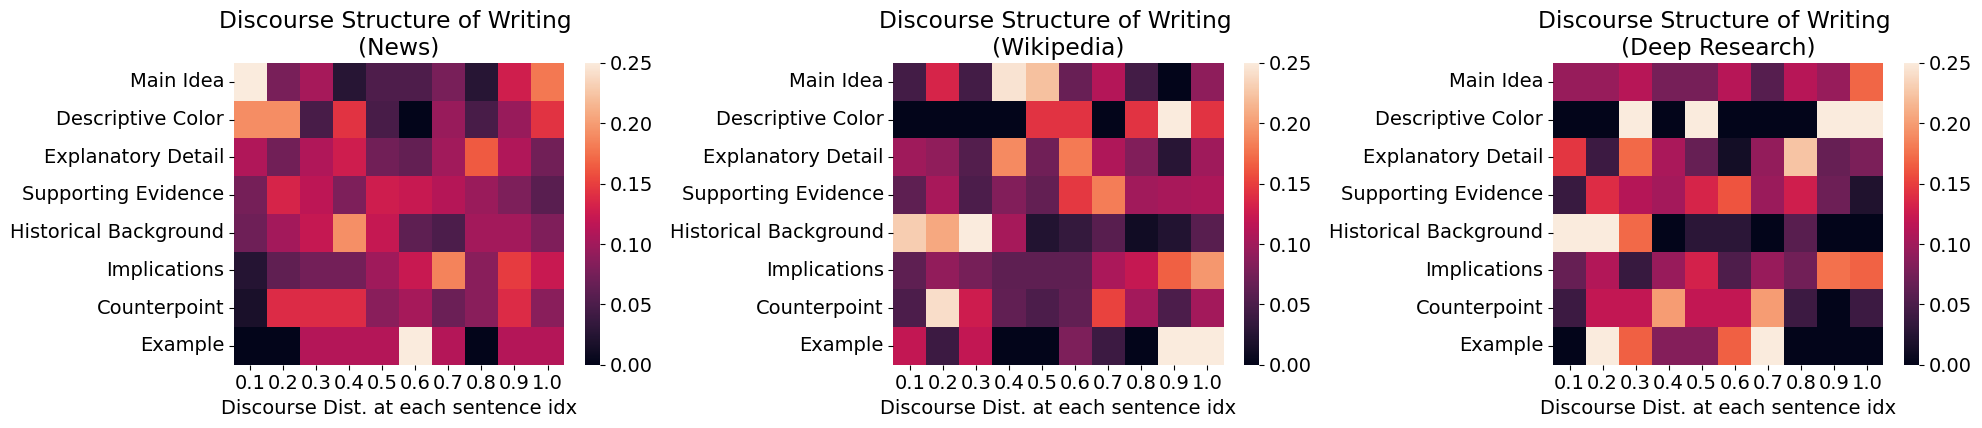

In [928]:
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rc('font', size=14)
f, axarr = plt.subplots(1, 3, figsize=(20, 4.5))
vmin, vmax = 0, .25
aggs['news'].pipe(lambda df: sns.heatmap(df, vmax=vmax, vmin=vmin, ax=axarr[0]))#, vmax=.102))
axarr[0].set_title('Discourse Structure of Writing \n(News)')
axarr[0].set_ylabel('')
axarr[0].set_xlabel('Discourse Dist. at each sentence idx')
# ax.set_xticks(np.arange(len(neg_agg_df.columns)) + .5, list(map(lambda x: f'{x:.2f}', neg_agg_df.columns)));

aggs['wikipedia'].pipe(lambda df: sns.heatmap(df, vmax=vmax, vmin=vmin, ax=axarr[1]))#, vmax=.102))
axarr[1].set_title('Discourse Structure of Writing \n(Wikipedia)')
axarr[1].set_ylabel('')
axarr[1].set_xlabel('Discourse Dist. at each sentence idx')

aggs['deep_research'].pipe(lambda df: sns.heatmap(df, vmax=vmax, vmin=vmin, ax=axarr[2]))#, vmax=.102))
axarr[2].set_title('Discourse Structure of Writing \n(Deep Research)')
axarr[2].set_ylabel('')
axarr[2].set_xlabel('Discourse Dist. at each sentence idx')

plt.tight_layout()
plt.savefig('../figures/discourse_structure.png', bbox_inches='tight')

In [1068]:
import matplotlib.pyplot as plt

t = (u.all_discourse_labels_df
 .assign(c=1)
 .pivot_table(columns='discourse_type', index='source', values='c', aggfunc='sum')
 .pipe(lambda df: df.divide(df.sum(axis=1), axis=0))
 .loc[:, aggs['news'].index]
 .pipe(lambda df: df*100)
 
)

t.index.name = None
t.index = t.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))

t = t.style.format("{:.1f}%", na_rep='').background_gradient(cmap='Spectral', low=1, high=0, axis=None)
await h.generate_image_async(t, '../figures/discourse_types_overall.png')
t


discourse_type,Main Idea,Descriptive Color,Explanatory Detail,Supporting Evidence,Historical Background,Implications,Counterpoint,Example
DR,10.0%,0.8%,14.4%,35.3%,6.6%,25.9%,4.7%,2.3%
N,6.4%,3.5%,18.2%,31.1%,16.4%,13.4%,9.6%,1.5%
W,6.4%,1.0%,15.9%,40.0%,12.4%,9.4%,11.3%,3.6%


# Summary Statistics

In [1008]:
t = (h.full_combined_df
 .assign(num_sources=lambda df: df['citation_summaries'].apply(len))
 .groupby('source')
 ['num_sources']
 .quantile([.25, .5, .75]).unstack()
 .rename(index={'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'})
)
t.index.name = '# Sources'

In [1009]:
t.columns = ['Q1', 'Q2', 'Q3']

In [1012]:
t.astype(int)
await h.generate_image_async(t.astype(int), '../figures/num_sources.png')

In [1025]:
print(json.dumps(h.all_annotated_citations_df.iloc[30].to_dict(), indent=4))

{
    "source": "deep_research",
    "title": "COP29 in Baku: Navigating Finance, Finalizing Rules, and Confronting a Widening Climate Action Gap",
    "citation": "3 Minutes on Panda Diplomacy | American Magazine | American ...",
    "Information": "Pandas, under President Xi Jinping's leadership, are considered as 'envoys of friendship' in China's strategic endeavors. These strategic loans are used to advance China's national objectives, enhance global influence, and spread its rich cultural history. Panda loans often coincide with significant diplomatic events or anniversaries, underscoring their role in diplomatic relations. This strategic approach also aligns with creating favorable public opinions internationally, as the 'envoy of friendship' narrative promotes warmth and generous perceptions, balancing the strategic realities and financial commitments involved in these loan agreements. This strengthens China's diplomatic arsenal, elevating pandas beyond cultural symbols to strat

In [1065]:
q = u.all_discourse_labels_df.groupby('source')['num_sentences'].quantile([.25, .5, .75]).unstack().astype(int)
q.index.name = None
q.index = q.index.map(lambda x: {'deep_research': 'DR', 'news': 'N', 'wikipedia': 'W'}.get(x, x))
q.columns = ['Q1', 'Q2', 'Q3']
await h.generate_image_async(q, '../figures/num_sentences.png')
q

,Q1,Q2,Q3
DR,102,169,262
N,38,55,59
W,120,703,703
